# Oscilaciones de Rabi

En este notebook el lector puede bservar las oscilaciones de Rabi bajo diferentes condiciones

In [1]:
from src import ahs_utils

import time

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from scipy import optimize

from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation
from braket.ahs.atom_arrangement import AtomArrangement
from braket.ahs.driving_field import DrivingField
from braket.devices import LocalSimulator
from braket.timings.time_series import TimeSeries

In [ ]:
# Parámetros de la simulación
T_max = 1 * 1e-6  # Duración de la evolución en segundos (1 microsegundo)
num_points = 50  # Número de puntos de medición
times = np.linspace(0, T_max, num_points)  # Tiempo de simulación en segundos
shots = 2000  # Número de shots

# Definir el sistema de un solo átomo
atoms = AtomArrangement()
atoms.add(np.array([0.0, 0.0]))  # Átomo en el origen

# Definir los drivings
omega_value = 4 * np.pi * 1e6  # Frecuencia de Rabi en rad/s (4*pi rad/s = 2 MHz)
delta_value = 0.0 # Detuning global en Hz
phi_value = 0.0  # Fase global en radianes

density_evolution = []

for t_max in range(len(times)):
    # Construir la evolución de los drivings
    t_max = int(t_max)
    times_v2 = times[:t_max+2]
    omega_series = TimeSeries()
    for t in times_v2:
        omega_series.put(t, omega_value)

    delta_series = TimeSeries()
    for t in times_v2:
        delta_series.put(t, delta_value)

    phi_series = TimeSeries()
    for t in times_v2:
        phi_series.put(t, phi_value)

    driving_field = DrivingField(amplitude=omega_series,
                            phase=phi_series,
                            detuning=delta_series)

    # Definir el Hamiltoniano
    hamiltonian = AnalogHamiltonianSimulation(hamiltonian=driving_field, register=atoms)

    # Ejecutar la simulación local
    device = LocalSimulator("braket_ahs")
    task = device.run(hamiltonian, shots=shots)

    # Obtener resultados
    results = task.result()
    rydberg_density = results.get_avg_density().mean()
    density_evolution.append(rydberg_density)



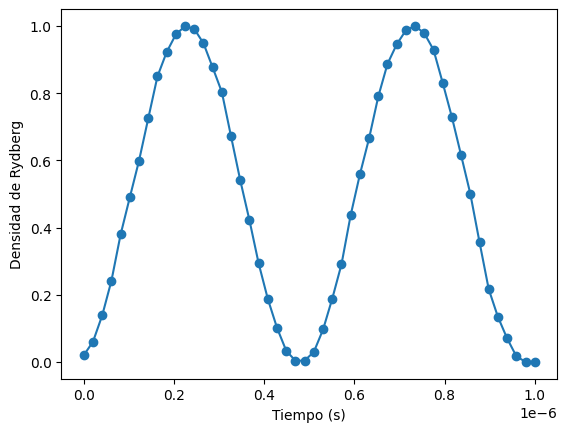

In [8]:
# Graficar la densidad de Rydberg en función del tiempo
plt.plot(times, density_evolution, 'o-')
plt.ylim(-0.05, 1.05)
plt.xlabel('Tiempo (s)')
plt.ylabel('Densidad de Rydberg')
plt.show()